In [2]:
import numpy as np
import matplotlib.pyplot as plt

**A supercar with rocket engines on two sides**

You are the driver of your awesome supercar on an infinitely long road, equipped with rocket engines on both the left and right sides. You can accelerate or decelerate the car, but remember that the power of your car is limited.

Given the initial position and velocity, your mission is simple : park your car at the origin (=make the position and velocity 0 simultaneously) and minimize the stopping time. Show your driving skills!

**Example 1.**

* We have a priori bang-bang assumption (i.e., your car is always at full power)
* We completely know the classical mechanics.
* We know how to minimize the stopping time by using the ad hoc geometric method.


Q1. Define the optimal thrust function whose inputs are the current position and velocity.

Q2. Employing that function, write the code that outputs the optimal stopping time and the corresponding trajectory. Discretize the time interval(=use a small time step dt<<<1)

Q3. Plot the velocity-position, position-time, velocity-time, and acceleration-time graphs.

Put the initial position q_0= 6
Put the initial velocity v_0= 4
11.475


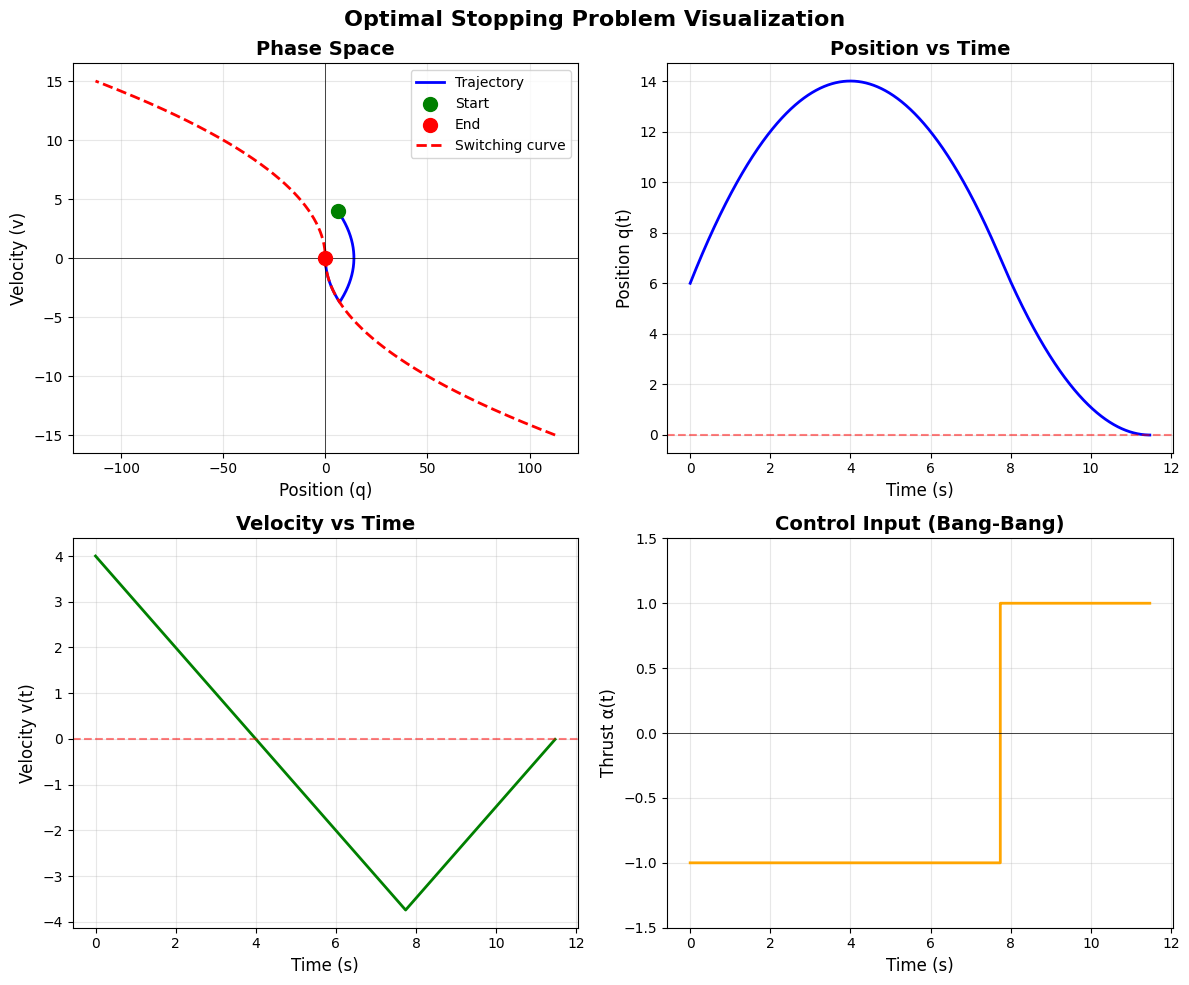


Simulation details:
Total steps: 11475
Time step: 0.001


In [3]:
#Basic example: A supercar with rocket engines on two sides:
#position q(t), thrust \alpha(t) (|\alpha(t)| <= 1)
#minimize the "stopping time"

#initial setting
q_0=float(input('Put the initial position q_0= '))
v_0=float(input('Put the initial velocity v_0= '))
dt = 0.001
step = 0
x = np.array([q_0, v_0])

#lists
q_history = [q_0]
v_history = [v_0]
t_history = [0]
alpha_history = []

#thrust
def alpha(q,v):
  if v*abs(v)+2*q>0:
    thrust = -1
  elif v*abs(v)+2*q<0:
    thrust = 1
  elif v>0:
    thrust = -1
  elif v<0:
    thrust = 1
  else:
    thrust = 0
  return thrust

while np.linalg.norm(x)> 0.01 :
  q, v = x[0], x[1]
  a = alpha(q,v)
  x[0] += 1/2 * (2*v + a *dt) * dt
  x[1] += a * dt
  step += 1

  #lists
  q_history.append(x[0])
  v_history.append(x[1])
  t_history.append(step * dt)
  alpha_history.append(a)

print(round(step * dt, 3))

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Optimal Stopping Problem Visualization', fontsize=16, fontweight='bold')

# 1. Phase Space (가장 중요!)
ax1 = axes[0, 0]
ax1.plot(q_history, v_history, 'b-', linewidth=2, label='Trajectory')
ax1.scatter([q_0], [v_0], color='green', s=100, zorder=5, label='Start')
ax1.scatter([q_history[-1]], [v_history[-1]], color='red', s=100, zorder=5, label='End')

# 스위칭 곡선: v^2/2 + q = 0 => q = -v^2/2
v_switch = np.linspace(-15, 15, 500)
q_switch = -v_switch * np.abs(v_switch) / 2
ax1.plot(q_switch, v_switch, 'r--', linewidth=2, label='Switching curve')

ax1.set_xlabel('Position (q)', fontsize=12)
ax1.set_ylabel('Velocity (v)', fontsize=12)
ax1.set_title('Phase Space', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# 2. Position vs Time
ax2 = axes[0, 1]
ax2.plot(t_history, q_history, 'b-', linewidth=2)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Position q(t)', fontsize=12)
ax2.set_title('Position vs Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# 3. Velocity vs Time
ax3 = axes[1, 0]
ax3.plot(t_history, v_history, 'g-', linewidth=2)
ax3.set_xlabel('Time (s)', fontsize=12)
ax3.set_ylabel('Velocity v(t)', fontsize=12)
ax3.set_title('Velocity vs Time', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# 4. Control Input (Thrust)
ax4 = axes[1, 1]
ax4.step(t_history[:-1], alpha_history, 'orange', linewidth=2, where='post')
ax4.set_xlabel('Time (s)', fontsize=12)
ax4.set_ylabel('Thrust α(t)', fontsize=12)
ax4.set_title('Control Input (Bang-Bang)', fontsize=14, fontweight='bold')
ax4.set_ylim([-1.5, 1.5])
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

# 추가 정보 출력
print(f'\nSimulation details:')
print(f'Total steps: {step}')
print(f'Time step: {dt}')

**Question 1.**

* We have a priori bang-bang assumption.
* We completely know the classical mechanics.
* We **do not** know how to minimize the stopping time.
* Nevertheless, we know **machine learning**.

Q1. Define an appropriate class for modeling the car.

Q2. Set up the neural network and training environment. Provide only the bang-bang assumption to the computer!

Q3. Plot the result. Compare this to the previous (analytic) one.

Put the initial position q_0= 4
Put the initial velocity v_0= 3
학습 시작 (총 1500 에피소드)...
Epi 0 | Avg Score: -22.90
Epi 200 | Avg Score: -24.05
Epi 400 | Avg Score: -30.46
Epi 600 | Avg Score: -30.84
Epi 800 | Avg Score: -33.03
Epi 1000 | Avg Score: -34.47
Epi 1200 | Avg Score: -34.66
Epi 1400 | Avg Score: -29.73


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

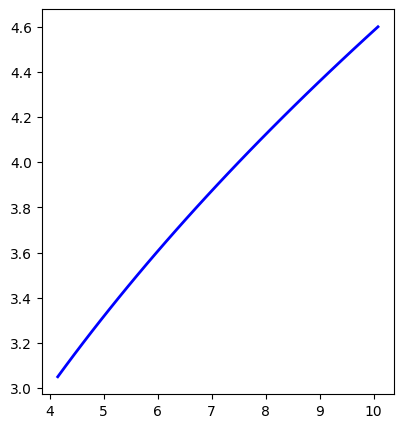

In [ ]:
#Further example 1. Machine Learinng + Two-sided rocket engine car
#For each time interval (with length=dt), AI randomly chooses \alpha=1 or -1.
#AI trains to minimize the stopping time

import torch
import torch.nn as nn
import torch.optim as optim
import random

q_0=float(input('Put the initial position q_0= '))
v_0=float(input('Put the initial velocity v_0= '))
# ---------------------------------------------------------
# 1. 환경 설정 수정 (여기가 핵심!)
# ---------------------------------------------------------
class CarEnvironment:
    def __init__(self, dt=0.05): # dt=0.05로 키움 (학습 속도 향상)
        self.dt = dt
        self.max_steps = 400 # 20초(400 * 0.05) 지나면 강제 종료
        self.reset()

    def reset(self):
        # 초기 상태를 랜덤하게! (스위칭 곡선을 배우기 위함)
        # q: -5 ~ 5, v: -5 ~ 5
        self.q = random.uniform(-5, 5)
        self.v = random.uniform(-5, 5)
        self.step_count = 0
        return np.array([self.q, self.v], dtype=np.float32)

    # (테스트용) 고정된 위치에서 시작하고 싶을 때 사용
    def reset_fixed(self, q, v):
        self.q = q
        self.v = v
        self.step_count = 0
        return np.array([self.q, self.v], dtype=np.float32)

    def step_forward(self, action):
        # action: 0 -> -1, 1 -> +1
        alpha = 1.0 if action == 1 else -1.0

        # 물리 엔진 (Euler)
        self.q += self.v * self.dt + 0.5 * alpha * (self.dt ** 2)
        self.v += alpha * self.dt
        self.step_count += 1

        # 상태 벡터
        state = np.array([self.q, self.v], dtype=np.float32)

        # 종료 조건
        # 1. 성공: 원점 근처 정지
        success = np.linalg.norm(state) < 0.2
        # 2. 실패: 너무 멀리 날아감 (학습 효율을 위해 중요)
        out_of_bound = abs(self.q) > 10 or abs(self.v) > 10
        # 3. 시간 초과
        timeout = self.step_count >= self.max_steps

        done = success or out_of_bound or timeout

        # 보상 설계 (Reward Shaping)
        reward = -0.1 # 매 시간마다 감점 (빨리 끝내라)

        if success:
            reward += 10.0 # 성공 보상 팍팍!
        elif out_of_bound:
            reward -= 10.0 # 맵 밖으로 나가면 벌점

        return state, reward, done, alpha

# ---------------------------------------------------------
# 2. 신경망
# ---------------------------------------------------------
class PolicyNetwork(nn.Module):
    def __init__(self):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.softmax(self.fc3(x), dim=-1)

# ---------------------------------------------------------
# 3. 학습 루프 (안정화)
# ---------------------------------------------------------
def train(num_episodes=2000):
    env = CarEnvironment(dt=0.05)
    policy = PolicyNetwork()
    optimizer = optim.Adam(policy.parameters(), lr=0.002)

    score_history = []

    print(f"학습 시작 (총 {num_episodes} 에피소드)...")

    for epi in range(num_episodes):
        state = env.reset() # 랜덤 위치 시작
        log_probs = []
        rewards = []

        while True:
            state_tensor = torch.FloatTensor(state)
            probs = policy(state_tensor)

            # 확률 분포대로 샘플링 (탐색)
            m = torch.distributions.Categorical(probs)
            action = m.sample()

            next_state, reward, done, _ = env.step_forward(action.item())

            log_probs.append(m.log_prob(action))
            rewards.append(reward)
            state = next_state

            if done: break

        # --- REINFORCE 알고리즘 업데이트 ---
        R = 0
        returns = []
        # 뒤에서부터 보상 누적 (Discounted Return)
        for r in rewards[::-1]:
            R = r + 0.99 * R
            returns.insert(0, R)

        returns = torch.tensor(returns)
        # 보상 정규화 (학습 안정화 필수 테크닉)
        if len(returns) > 1:
            returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        loss = []
        for log_prob, R in zip(log_probs, returns):
            loss.append(-log_prob * R)

        optimizer.zero_grad()
        sum(loss).backward()
        optimizer.step()

        score_history.append(sum(rewards))

        if epi % 200 == 0:
            print(f"Epi {epi} | Avg Score: {np.mean(score_history[-50:]):.2f}")

    return policy

# ---------------------------------------------------------
# 4. 결과 확인 및 시각화
# ---------------------------------------------------------
trained_model = train(num_episodes=1500)

# 시뮬레이션 (고정된 위치에서 테스트)
env = CarEnvironment(dt=0.05)
# 사용자가 원했던 그 초기값
state = env.reset_fixed(q=q_0, v=v_0)

q_list, v_list, u_list = [], [], []

done = False
while not done:
    with torch.no_grad():
        probs = trained_model(torch.FloatTensor(state))
        action = torch.argmax(probs).item() # 테스트 땐 가장 확률 높은 행동

    state, _, done, u = env.step_forward(action)
    q_list.append(state[0])
    v_list.append(state[1])
    u_list.append(u)

# 그래프 그리기
plt.figure(figsize=(10, 5))

# 궤적
plt.subplot(1, 2, 1)
plt.plot(q_list, v_list, 'b-', linewidth=2, label='RL Path')
plt

**Example 1.**

* We have a priori bang-bang assumption (i.e., your car is always at full power)
* We completely know the physical dynamics and results.
* We know how to minimize the stopping time by using the ad hoc. geometric method.


Q1. Define the optimal thrust function whose inputs are the current position and velocity.

Q2. Employing that function, write the code that outputs the optimal stopping time.

Q3. Plot the velocity-position, position-time, velocity-time, and acceleration-time graphs.

--------------------------------------------------

**A magician and a pendulum**

You are a magician and you have a hanging pendulum. You can exert force to the pendulum, but remember that your magic power is limited.

Given the initial position and velocity of the pendulum, your mission is the same : make the position and velocity 0 simultaneously and minimize the stopping time.

**Question 2.**

* We have a priori bang-bang assumption.
* We only know **the governing equation** of the pendulum.
* We do not know how to minimize the stopping time.
* We know machine learning.


Q. Do the same as in **Question 1**, except that you must simulate the behavior of the pendulum by Runge-Kutta 4 method.



-----------------------------------------------------------------------

**A stock contest**

You are the key player in a stock contest. Your strategy is the following : part of the profit is reinvested, and the rest is saved. Surely you need to prove your investment skills at adjusting the reinvestment-ratio.

Given the seed money and the end time of the contest, you need to maximize your total profit.

**Question 3.**

* We **do not** have a priori bang-bang assumption.
* We completely know **the closed form of the payoff functional(=total profit)**.
* We do not know how to maximize the total profit.
* We know machine learning.


Q. By using machine learning technique, find the optimal investment strategy.

In [ ]:
#이거는 저도 궁금함... 좋은 방법이 있는지...

In [ ]:
#Further example 2. ODE Solver + Pendulum + ML
#In this case we do not solve given ODE analytically.
#With the same principle in previous, we minimize the stopping time of pendulum (+external force) via using ML.

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

# 사용자 입력
theta_0 = float(input('Put the initial angle theta_0 = '))
omega_0 = float(input('Put the initial angular velocity theta\'_0 = '))

# ---------------------------------------------------------
# 1. 진자 환경 (Pendulum Environment) - 물리 엔진 교체!
# ---------------------------------------------------------
class PendulumEnvironment:
    def __init__(self, dt=0.05):
        self.dt = dt
        self.max_steps = 400 # 20초 제한
        self.reset()

    def reset(self):
        # 학습을 위해 다양한 초기 상태에서 시작 (-4 ~ 4)
        self.theta = random.uniform(-4, 4)
        self.omega = random.uniform(-4, 4) # omega = theta'
        self.step_count = 0
        return np.array([self.theta, self.omega], dtype=np.float32)

    def reset_fixed(self, theta, omega):
        self.theta = theta
        self.omega = omega
        self.step_count = 0
        return np.array([self.theta, self.omega], dtype=np.float32)

    def step_forward(self, action):
        # action: 0 -> -1 (왼쪽 토크), 1 -> +1 (오른쪽 토크)
        alpha = 1.0 if action == 1 else -1.0

        # --- [핵심 변경: 진자 동역학] ---
        # 수식: theta'' = alpha - 3*theta' - 2*theta
        # 변수 매핑: theta' = omega, theta'' = alpha - 3*omega - 2*theta

        accel = alpha - 3 * self.omega - 2 * self.theta

        # 오일러 적분 (Euler Integration)
        self.theta += self.omega * self.dt
        self.omega += accel * self.dt
        self.step_count += 1

        state = np.array([self.theta, self.omega], dtype=np.float32)

        # 종료 조건
        # 1. 성공: 원점(0,0) 근처 도달 (진동하므로 판정 범위를 0.1로 잡음)
        distance = np.linalg.norm(state)
        success = distance < 0.1

        # 2. 실패: 발산 (너무 멀리 감)
        out_of_bound = abs(self.theta) > 8 or abs(self.omega) > 8
        timeout = self.step_count >= self.max_steps

        done = success or out_of_bound or timeout

        # 보상 설계
        reward = -0.1 # 시간 지연 벌점
        if success:
            reward += 20.0 # 성공 보상 (난이도가 있어서 조금 높임)
        elif out_of_bound:
            reward -= 10.0 # 이탈 벌점

        return state, reward, done, alpha

# ---------------------------------------------------------
# 2. 신경망 (Policy Network) - 이전과 동일
# ---------------------------------------------------------
class PolicyNetwork(nn.Module):
    def __init__(self):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 2) # 출력: 확률 2개

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.softmax(self.fc3(x), dim=-1)

# ---------------------------------------------------------
# 3. 학습 루프 (Training Loop) - 이전과 동일
# ---------------------------------------------------------
def train(num_episodes=2000):
    env = PendulumEnvironment(dt=0.05)
    policy = PolicyNetwork()
    optimizer = optim.Adam(policy.parameters(), lr=0.002)

    score_history = []
    print(f"진자 제어 학습 시작 (총 {num_episodes} 에피소드)...")

    for epi in range(num_episodes):
        state = env.reset()
        log_probs = []
        rewards = []

        while True:
            state_tensor = torch.FloatTensor(state)
            probs = policy(state_tensor)
            m = torch.distributions.Categorical(probs)
            action = m.sample()

            next_state, reward, done, _ = env.step_forward(action.item())

            log_probs.append(m.log_prob(action))
            rewards.append(reward)
            state = next_state

            if done: break

        # REINFORCE Update
        R = 0
        returns = []
        for r in rewards[::-1]:
            R = r + 0.99 * R
            returns.insert(0, R)
        returns = torch.tensor(returns)
        if len(returns) > 1:
            returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        loss = []
        for log_prob, R in zip(log_probs, returns):
            loss.append(-log_prob * R)

        optimizer.zero_grad()
        if loss:
            sum(loss).backward()
            optimizer.step()

        score_history.append(sum(rewards))

        if epi % 200 == 0:
            avg_score = np.mean(score_history[-50:])
            print(f"Epi {epi} | Avg Score: {avg_score:.2f}")

    return policy

# ---------------------------------------------------------
# 4. 결과 확인 및 시각화
# ---------------------------------------------------------
# 학습 실행
trained_policy = train(num_episodes=2500) # 진자가 조금 더 어려워서 에피소드 늘림

# 테스트 시뮬레이션
env = PendulumEnvironment(dt=0.05)
state = env.reset_fixed(theta=theta_0, omega=omega_0)

theta_list, omega_list, alpha_list = [], [], []
done = False

while not done:
    with torch.no_grad():
        probs = trained_policy(torch.FloatTensor(state))
        action = torch.argmax(probs).item()

    state, _, done, alpha = env.step_forward(action)
    theta_list.append(state[0])
    omega_list.append(state[1])
    alpha_list.append(alpha)

# 그래프
plt.figure(figsize=(12, 5))

# Phase Plane (위상 평면)
plt.subplot(1, 2, 1)
plt.plot(theta_list, omega_list, 'b-', linewidth=2, label='Controlled Trajectory')
plt.plot(theta_list[0], omega_list[0], 'go', label='Start')
plt.plot(0, 0, 'rx', label='Goal')

# 벡터장 그리기 (배경에 흐름 표시)
x = np.linspace(-4, 4, 20)
y = np.linspace(-4, 4, 20)
X, Y = np.meshgrid(x, y)
# 제어 입력이 0일 때의 자연스러운 흐름 (감쇠 진동)
U = Y
V = -3*Y - 2*X
plt.quiver(X, Y, U, V, alpha=0.2, color='gray')

plt.title(f"Pendulum Phase Plane\n(Initial: {theta_0}, {omega_0})")
plt.xlabel("Angle (theta)")
plt.ylabel("Angular Velocity (omega)")
plt.legend()
plt.grid()

# Control Input
plt.subplot(1, 2, 2)
time_axis = np.arange(len(alpha_list)) * env.dt
plt.step(time_axis, alpha_list, 'r-', where='post')
plt.title("Magician's Force (Alpha)")
plt.xlabel("Time (s)")
plt.ylabel("Torque")
plt.ylim(-1.5, 1.5)
plt.grid()

plt.tight_layout()
plt.show()

print(f"최종 도달 시간: {len(alpha_list) * env.dt:.2f}초")

In [ ]:
#Further example 3. Factory owner + ML
#In this case we do not assume the bang-bang control.
#For each time interval (with length=dt), AI randomly chooses \alpha so that minimze the given payoff functional.

